In [1]:
#Questions: Are the different coefficients uniform amongst all the nodes in the graph ? Right now, they are equal for all nodes. 
# Yes they should be equal since we are assuming that the effect is shared and we just variate over the value of the feature.
#To easily compute and update the happiness, we keep the following properties true during the evolution of the graph:
# - the attribute contains the happiness of the current node at each step
# - at the begining of a step, the attribute 'happiness_updating' contains coeff_X*X + coeff_Z*Z + coeff_previous_happiness*happiness.
#Therefore we only have to add the influence of all the other nodes at 'happiness_updating' to obtain the updated happiness.

#Here, at each step, we choose a random node and add one friend to it. Then update the happiness of everyone.

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

In [3]:
#Defining our global variables:
N_nodes = 100

In [4]:
#Defining graph
G=nx.DiGraph()
G.add_nodes_from(range(N_nodes))

In [5]:
#Defining attributes
for i in range(N_nodes):
    G.node[i]['X'] = random.random()
    G.node[i]['Z'] = random.random()
    G.node[i]['coeff_X'] = 1
    G.node[i]['coeff_Z'] = 1
    G.node[i]['coeff_previous_happiness'] = 1
    G.node[i]['coeff_influence'] = 1
    G.node[i]['happiness'] = G.node[i]['X'] * G.node[i]['coeff_X'] + G.node[i]['Z'] * G.node[i]['coeff_Z']
    G.node[i]['happiness_updating'] = G.node[i]['X'] * G.node[i]['coeff_X'] + G.node[i]['Z'] * G.node[i]['coeff_Z']+ G.node[i]['coeff_previous_happiness']* G.node[i]['happiness']

In [6]:
#Creating similarity matrices
similarity_matrix = [[0 for i in range(N_nodes)] for j in range(N_nodes)]
observable_matrix = [[0 for i in range(N_nodes)] for j in range(N_nodes)]
similarity_coefficient = 3
for i in range(N_nodes):
    for j in range(i):
        similarity_matrix[i][j] = -similarity_coefficient*math.sqrt((G.node[i]['X'] - G.node[j]['X'])**2 + (G.node[i]['Z'] - G.node[j]['Z'])**2)
        observable_matrix[i][j] = math.sqrt((G.node[i]['X'] - G.node[j]['X'])**2) 
        similarity_matrix[i][j] = 1.0 / (1.0 + math.exp(-similarity_matrix[i][j]))
        similarity_matrix[j][i] = similarity_matrix[i][j]
        observable_matrix[j][i] = observable_matrix[i][j]
        


In [7]:
#Creating set of potential friends for each node
list_potential_friends = [[] for i in range(N_nodes)]
for i in range(N_nodes):
    for j in range(N_nodes):
        if i != j:
            if random.random() < similarity_matrix[i][j]:
                list_potential_friends[i].append(j)

In [8]:
#Function to add to the node "node" a random friend from his list of friends (and to remove him from the list)
def add_one_friend(node, Graph):
    if len(list_potential_friends[node])>0:
        new_friend = random.choice(list_potential_friends[node])
        list_potential_friends[node].remove(new_friend)
        Graph.add_edge(node, new_friend)

In [9]:
#This step is made to add a friend for each node of the Graph
def init_step(Graph):
    for node in range(N_nodes):
        add_one_friend(node, Graph)

In [10]:
#Update happiness 
def update_happiness(Graph):
    for (a,b) in Graph.edges_iter():
        Graph.node[a]['happiness_updating'] +=  G.node[a]['coeff_influence'] *Graph.node[b]['happiness']/len(Graph.neighbors(a))
    for i in range(N_nodes):
        Graph.node[i]['happiness'] = G.node[i]['happiness_updating']
        Graph.node[i]['happiness_updating'] = G.node[i]['coeff_previous_happiness']*G.node[i]['happiness'] + G.node[i]['X'] * G.node[i]['coeff_X'] + G.node[i]['Z'] * G.node[i]['coeff_Z']

In [11]:
def run_step(Graph):
    for node in range(N_nodes):
        add_one_friend(node, Graph)
        update_happiness(Graph)

In [12]:
#NO fixed point algorithm (convergence not guaranteed), rather use the outputs at the previous time.
#Think about best convergence, not go through the nodes in the same way at each step

In [13]:
list_potential_friends

[[1,
  2,
  3,
  6,
  8,
  9,
  12,
  13,
  14,
  28,
  30,
  37,
  51,
  53,
  65,
  66,
  67,
  68,
  72,
  73,
  75,
  83,
  85,
  87,
  95,
  97],
 [0,
  8,
  9,
  20,
  22,
  41,
  57,
  58,
  59,
  64,
  68,
  69,
  71,
  73,
  76,
  77,
  79,
  83,
  84,
  86,
  90,
  92,
  94],
 [1,
  7,
  9,
  11,
  13,
  17,
  18,
  19,
  25,
  35,
  38,
  39,
  49,
  54,
  61,
  64,
  67,
  70,
  72,
  73,
  75,
  77,
  84,
  89,
  92,
  96,
  98,
  99],
 [0,
  8,
  14,
  15,
  16,
  19,
  21,
  24,
  31,
  33,
  34,
  48,
  51,
  53,
  60,
  62,
  65,
  72,
  73,
  74,
  79,
  90,
  99],
 [5,
  6,
  13,
  17,
  20,
  29,
  30,
  31,
  34,
  42,
  44,
  46,
  51,
  54,
  59,
  66,
  70,
  73,
  82,
  84,
  96,
  98],
 [6,
  20,
  21,
  24,
  25,
  35,
  37,
  46,
  49,
  51,
  52,
  56,
  59,
  63,
  66,
  68,
  75,
  76,
  77,
  88,
  95],
 [27, 34, 38, 47, 50, 52, 57, 59, 68, 98],
 [0, 1, 2, 4, 5, 19, 24, 25, 47, 48, 62, 67, 68, 69, 70, 77, 95, 96, 99],
 [3,
  9,
  11,
  12,
  14,
  16,
  

In [14]:
#Main run for the graph
nb_steps=0
init_step(G)
update_happiness(G)
for i in range(nb_steps):
    run_step(G)

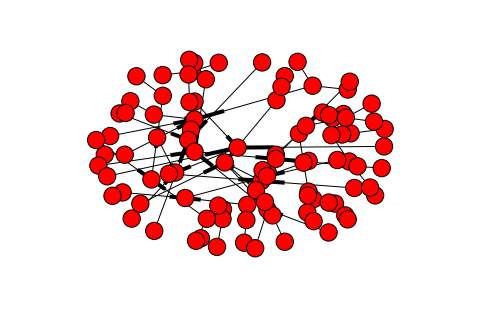

In [15]:
#Plotting the last graph obtained
nx.draw(G)
plt.show()

In [16]:
for edge in G.edges():
    print edge

print (0,2) in G.edges()

(0, 1)
(1, 71)
(2, 92)
(3, 99)
(4, 6)
(5, 51)
(6, 47)
(7, 25)
(8, 33)
(9, 31)
(10, 44)
(11, 10)
(12, 71)
(13, 67)
(14, 99)
(15, 77)
(16, 54)
(17, 11)
(18, 6)
(19, 21)
(20, 45)
(21, 56)
(22, 91)
(23, 93)
(24, 97)
(25, 60)
(26, 61)
(27, 2)
(28, 67)
(29, 82)
(30, 20)
(31, 98)
(32, 99)
(33, 97)
(34, 2)
(35, 21)
(36, 18)
(37, 82)
(38, 2)
(39, 88)
(40, 86)
(41, 69)
(42, 22)
(43, 85)
(44, 97)
(45, 46)
(46, 8)
(47, 28)
(48, 1)
(49, 34)
(50, 13)
(51, 87)
(52, 13)
(53, 69)
(54, 49)
(55, 92)
(56, 89)
(57, 60)
(58, 69)
(59, 34)
(60, 71)
(61, 73)
(62, 55)
(63, 42)
(64, 34)
(65, 66)
(66, 14)
(67, 24)
(68, 62)
(69, 56)
(70, 34)
(71, 75)
(72, 8)
(73, 57)
(74, 35)
(75, 49)
(76, 44)
(77, 80)
(78, 92)
(79, 76)
(80, 59)
(81, 43)
(82, 21)
(83, 51)
(84, 52)
(85, 4)
(86, 84)
(87, 89)
(88, 21)
(89, 48)
(90, 14)
(91, 73)
(92, 84)
(93, 70)
(94, 58)
(95, 1)
(96, 57)
(97, 65)
(98, 50)
(99, 9)
False


In [17]:
# Creation of Treatment and Response Table
edges = []
treatment = []
response = []
observable = []

for j in range(N_nodes):
    observed_similarity = []
    n_friends = 0
    for i in range(N_nodes):
        if i!=j:
            if (i,j) in G.edges():
                n_friends+=1
                edges.append((i,j))
                treatment.append(True)
                response.append(G.node[i]['happiness'])
                observable.append(G.node[i]['X'])
            else:
                observed_similarity.append((observable_matrix[i][j],(i,j)))
    sorted(observed_similarity)
    for k in range(n_friends):
        control = observed_similarity[k][1]
        edges.append(control)
        treatment.append(False)
        response.append(G.node[control[0]]['happiness'])
        observable.append(G.node[control[0]]['X'])
        
data = pd.DataFrame({'Edges':edges,
                    'Treatment': treatment,
                    'Response': response,
                    'X': observable})
        
        
        

In [18]:
data

,Edges,Response,Treatment,X
0,"(0, 1)",3.185886,True,0.296430
1,"(48, 1)",3.848402,True,0.591607
2,"(95, 1)",4.126482,True,0.735960
3,"(2, 1)",3.557298,False,0.681198
4,"(3, 1)",3.521966,False,0.367911
5,"(4, 1)",2.222506,False,0.553243
6,"(27, 2)",2.621473,True,0.745210
7,"(34, 2)",2.870056,True,0.693931
8,"(38, 2)",2.932384,True,0.846675
9,"(0, 2)",3.185886,False,0.296430


In [19]:
result = sm.ols(formula="Response ~ Treatment + X", data=data).fit()

In [20]:
result.params

Intercept            2.471519
Treatment[T.True]   -0.681323
X                    2.226397
dtype: float64